# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

iteration 0 / 500: loss 9.006580
iteration 100 / 500: loss 3.666497
iteration 200 / 500: loss 3.315755
iteration 300 / 500: loss 2.726325
iteration 400 / 500: loss 2.601682
learning rate: 2.002526e-02, reg: 9.491553e-02, train_acc: 0.500061, val_acc: 0.486000 


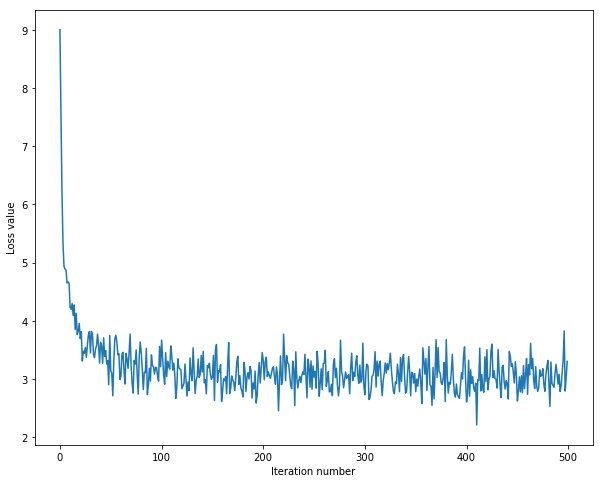

iteration 0 / 500: loss 9.006881
iteration 100 / 500: loss 3.326163
iteration 200 / 500: loss 2.851217
iteration 300 / 500: loss 3.241182
iteration 400 / 500: loss 3.302990
learning rate: 3.034131e-02, reg: 9.584347e-03, train_acc: 0.499612, val_acc: 0.501000 


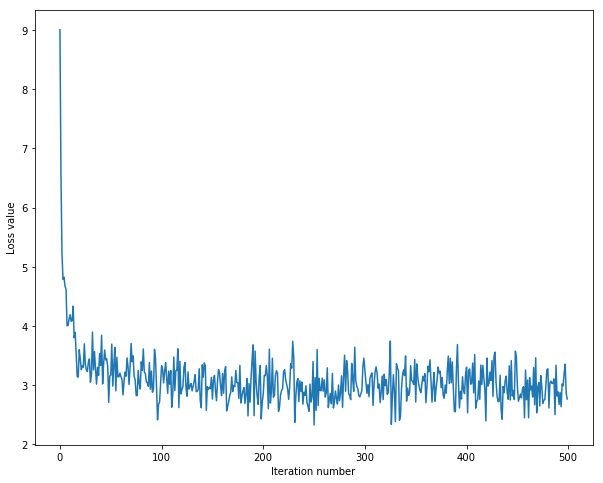

iteration 0 / 500: loss 8.991003
iteration 100 / 500: loss 3.635426
iteration 200 / 500: loss 2.785930
iteration 300 / 500: loss 3.117197
iteration 400 / 500: loss 3.013608
learning rate: 4.810823e-02, reg: 2.947983e-03, train_acc: 0.496939, val_acc: 0.500000 


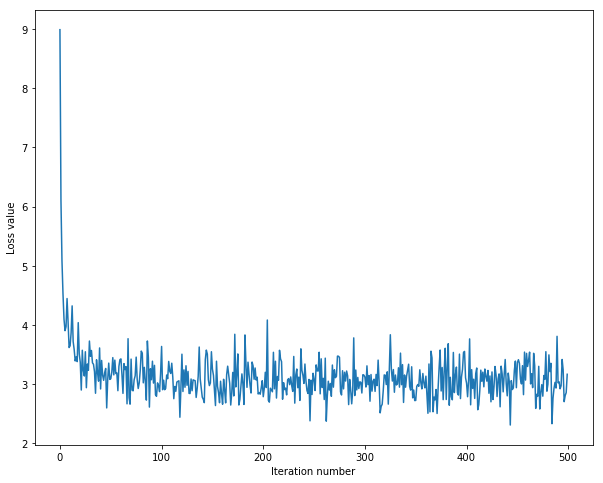

iteration 0 / 500: loss 9.001011
iteration 100 / 500: loss 2.879740
iteration 200 / 500: loss 2.942734
iteration 300 / 500: loss 3.611897
iteration 400 / 500: loss 3.393239
learning rate: 3.752938e-02, reg: 6.798996e-02, train_acc: 0.500102, val_acc: 0.474000 


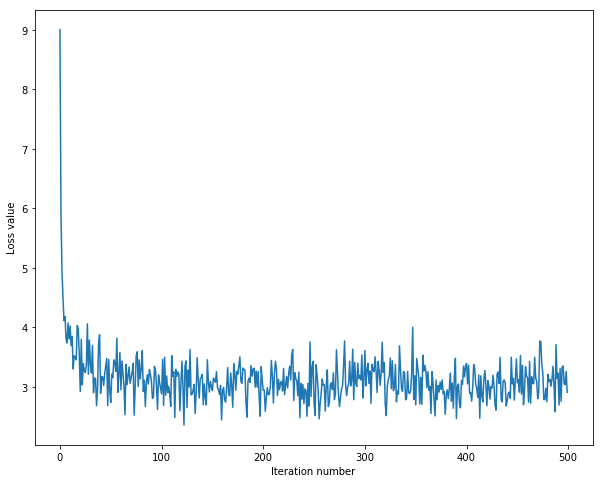

iteration 0 / 500: loss 8.996651
iteration 100 / 500: loss 2.794133
iteration 200 / 500: loss 2.715626
iteration 300 / 500: loss 2.693993
iteration 400 / 500: loss 2.991942
learning rate: 3.846424e-02, reg: 3.398669e-02, train_acc: 0.495592, val_acc: 0.501000 


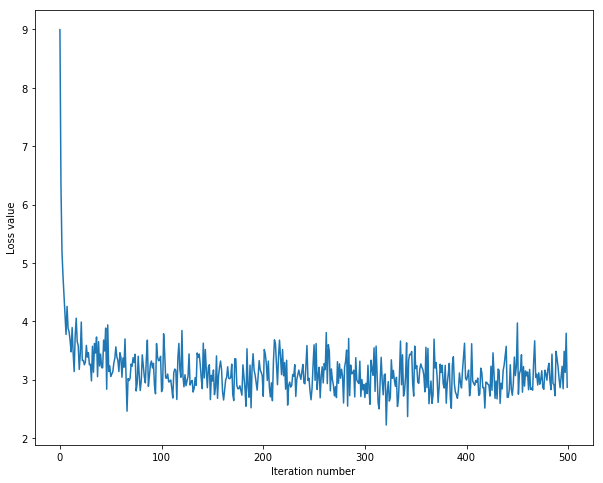

iteration 0 / 500: loss 9.005513
iteration 100 / 500: loss 2.957291
iteration 200 / 500: loss 2.935399
iteration 300 / 500: loss 2.740503
iteration 400 / 500: loss 2.797390
learning rate: 1.759572e-02, reg: 1.649063e-02, train_acc: 0.506367, val_acc: 0.487000 


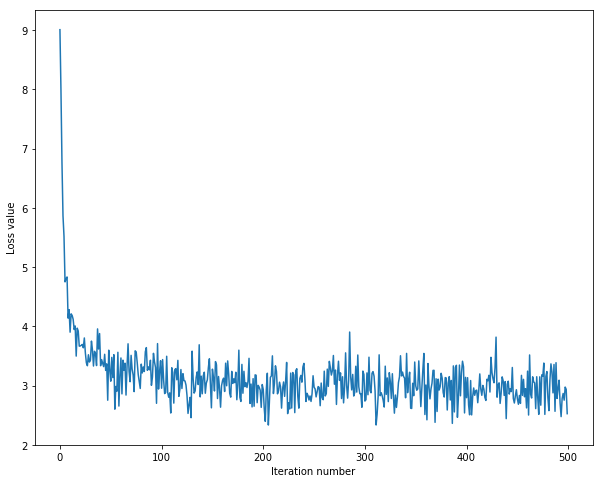

iteration 0 / 500: loss 9.000009
iteration 100 / 500: loss 2.472403
iteration 200 / 500: loss 2.461203
iteration 300 / 500: loss 2.854623
iteration 400 / 500: loss 3.015402
learning rate: 5.865083e-02, reg: 5.798514e-03, train_acc: 0.495531, val_acc: 0.488000 


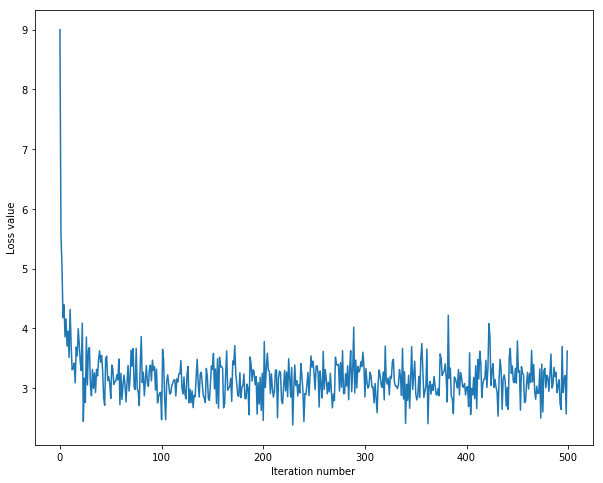

iteration 0 / 500: loss 8.995583
iteration 100 / 500: loss 3.834116
iteration 200 / 500: loss 3.177729
iteration 300 / 500: loss 2.833329
iteration 400 / 500: loss 3.366391
learning rate: 8.350706e-02, reg: 3.274657e-03, train_acc: 0.487082, val_acc: 0.481000 


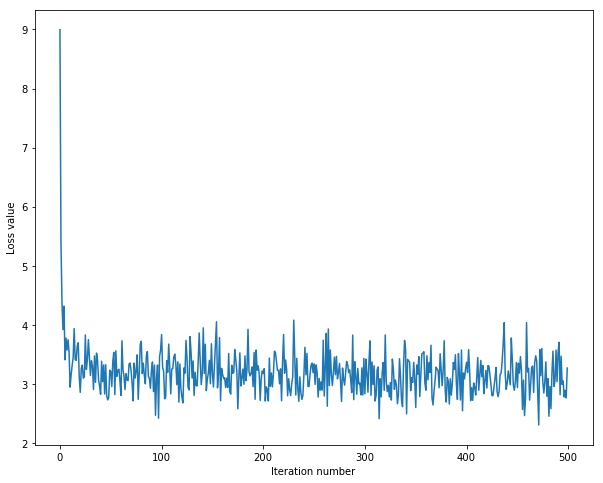

iteration 0 / 500: loss 9.013555
iteration 100 / 500: loss 3.014907
iteration 200 / 500: loss 2.820357
iteration 300 / 500: loss 3.094934
iteration 400 / 500: loss 2.478056
learning rate: 1.984805e-02, reg: 4.644538e-02, train_acc: 0.502245, val_acc: 0.485000 


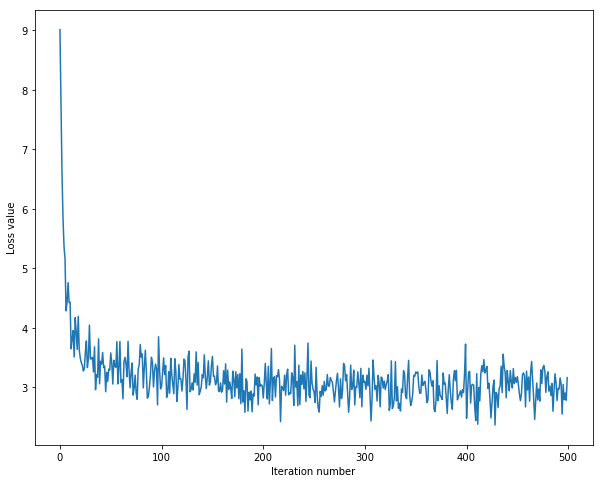

iteration 0 / 500: loss 8.976818
iteration 100 / 500: loss 3.074583
iteration 200 / 500: loss 2.790434
iteration 300 / 500: loss 2.983387
iteration 400 / 500: loss 3.047113
learning rate: 1.553991e-02, reg: 5.984437e-02, train_acc: 0.504755, val_acc: 0.487000 


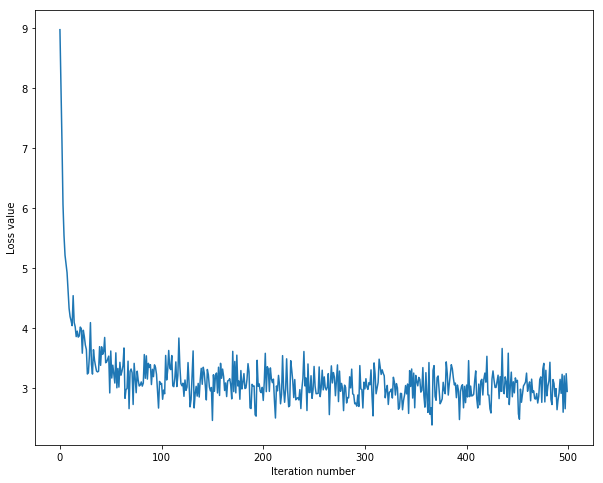

lr 1.553991e-02 reg 5.984437e-02 train accuracy: 0.504755 val accuracy: 0.487000
lr 1.759572e-02 reg 1.649063e-02 train accuracy: 0.506367 val accuracy: 0.487000
lr 1.984805e-02 reg 4.644538e-02 train accuracy: 0.502245 val accuracy: 0.485000
lr 2.002526e-02 reg 9.491553e-02 train accuracy: 0.500061 val accuracy: 0.486000
lr 3.034131e-02 reg 9.584347e-03 train accuracy: 0.499612 val accuracy: 0.501000
lr 3.752938e-02 reg 6.798996e-02 train accuracy: 0.500102 val accuracy: 0.474000
lr 3.846424e-02 reg 3.398669e-02 train accuracy: 0.495592 val accuracy: 0.501000
lr 4.810823e-02 reg 2.947983e-03 train accuracy: 0.496939 val accuracy: 0.500000
lr 5.865083e-02 reg 5.798514e-03 train accuracy: 0.495531 val accuracy: 0.488000
lr 8.350706e-02 reg 3.274657e-03 train accuracy: 0.487082 val accuracy: 0.481000
best validation accuracy achieved during cross-validation: 0.501000


In [21]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers import LinearSVM

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
def plt_loss(loss_hist):
    plt.plot(loss_hist)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    
from numpy.random import uniform
# Random search
maxcount = 10
for count in xrange(maxcount):
    lr = 10**uniform(-2, -1)
    reg = 10**uniform(-3, -1)
    svm = LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, lr, reg, num_iters=500, verbose=True)
    train_acc = (svm.predict(X_train_feats) == y_train).mean()
    val_acc = (svm.predict(X_val_feats) == y_val).mean()
    print "learning rate: %e, reg: %e, train_acc: %5f, val_acc: %5f "% (lr, reg, train_acc, val_acc)
    if val_acc > best_val:
        best_val = val_acc
        best_svm = svm
    results[(lr, reg)] = (train_acc, val_acc)
    plt_loss(loss_hist)

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

In [22]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.475


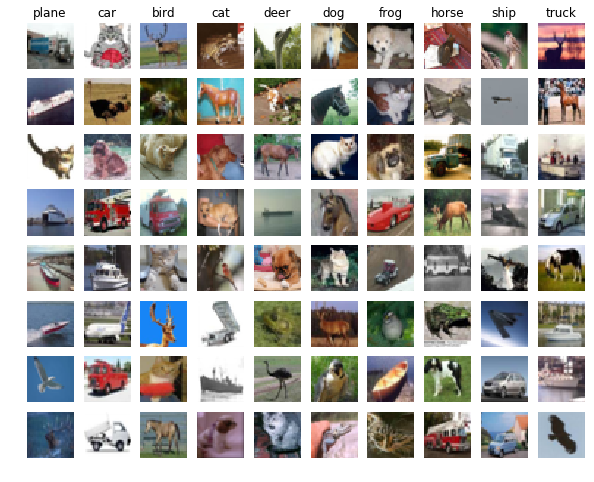

In [23]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [24]:
print X_train_feats.shape

(49000, 155)


iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 1.589676
iteration 200 / 2000: loss 1.703716
iteration 300 / 2000: loss 1.503063
iteration 400 / 2000: loss 1.467009
iteration 500 / 2000: loss 1.396154
iteration 600 / 2000: loss 1.543749
iteration 700 / 2000: loss 1.426334
iteration 800 / 2000: loss 1.612078
iteration 900 / 2000: loss 1.485468
iteration 1000 / 2000: loss 1.425240
iteration 1100 / 2000: loss 1.534407
iteration 1200 / 2000: loss 1.577821
iteration 1300 / 2000: loss 1.501062
iteration 1400 / 2000: loss 1.420160
iteration 1500 / 2000: loss 1.515479
iteration 1600 / 2000: loss 1.538852
iteration 1700 / 2000: loss 1.346774
iteration 1800 / 2000: loss 1.479936
iteration 1900 / 2000: loss 1.446463
learning rate: 1.201629e+00, reg: 5.119783e-03, train_acc: 0.569939, val_acc: 0.543000 


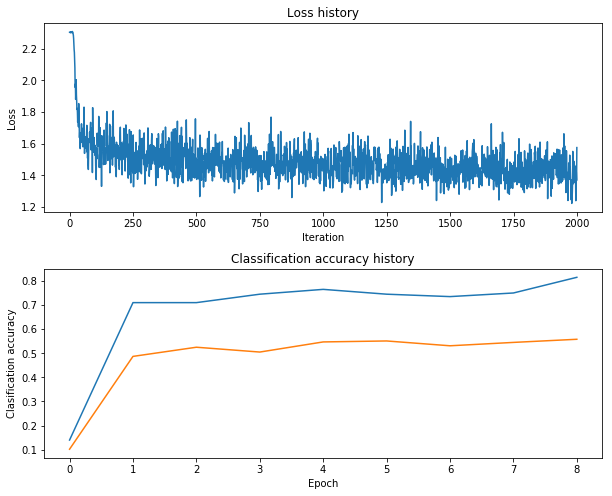

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 1.581179
iteration 200 / 2000: loss 1.457541
iteration 300 / 2000: loss 1.532171
iteration 400 / 2000: loss 1.311699
iteration 500 / 2000: loss 1.285009
iteration 600 / 2000: loss 1.407331
iteration 700 / 2000: loss 1.214366
iteration 800 / 2000: loss 1.184938
iteration 900 / 2000: loss 1.244277
iteration 1000 / 2000: loss 1.199261
iteration 1100 / 2000: loss 1.408340
iteration 1200 / 2000: loss 1.247298
iteration 1300 / 2000: loss 1.205651
iteration 1400 / 2000: loss 1.180814
iteration 1500 / 2000: loss 1.118100
iteration 1600 / 2000: loss 1.031992
iteration 1700 / 2000: loss 1.266870
iteration 1800 / 2000: loss 1.110911
iteration 1900 / 2000: loss 1.247590
learning rate: 1.380815e+00, reg: 1.217730e-03, train_acc: 0.722694, val_acc: 0.602000 


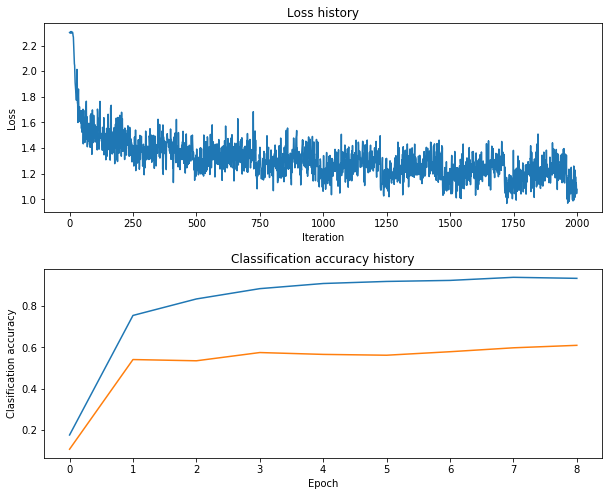

iteration 0 / 2000: loss 2.302588
iteration 100 / 2000: loss 1.521784
iteration 200 / 2000: loss 1.684695
iteration 300 / 2000: loss 1.476000
iteration 400 / 2000: loss 1.699667
iteration 500 / 2000: loss 1.635049
iteration 600 / 2000: loss 1.562313
iteration 700 / 2000: loss 1.480438
iteration 800 / 2000: loss 1.447084
iteration 900 / 2000: loss 1.462015
iteration 1000 / 2000: loss 1.499886
iteration 1100 / 2000: loss 1.588405
iteration 1200 / 2000: loss 1.415591
iteration 1300 / 2000: loss 1.535554
iteration 1400 / 2000: loss 1.510856
iteration 1500 / 2000: loss 1.543534
iteration 1600 / 2000: loss 1.640064
iteration 1700 / 2000: loss 1.636464
iteration 1800 / 2000: loss 1.448002
iteration 1900 / 2000: loss 1.306361
learning rate: 1.517549e+00, reg: 6.369921e-03, train_acc: 0.571918, val_acc: 0.521000 


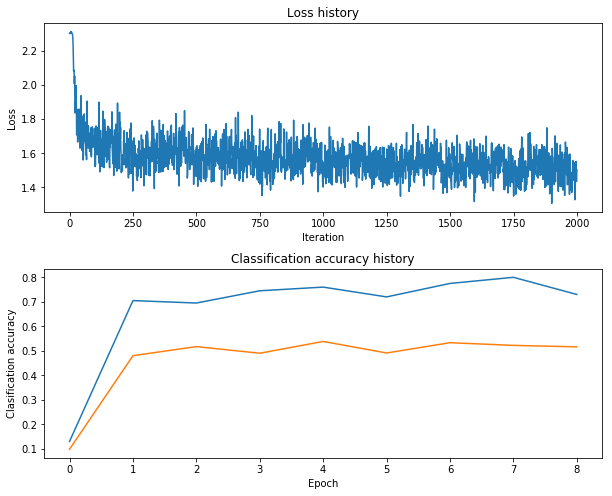

iteration 0 / 2000: loss 2.302588
iteration 100 / 2000: loss 1.589897
iteration 200 / 2000: loss 1.580816
iteration 300 / 2000: loss 1.525116
iteration 400 / 2000: loss 1.650312
iteration 500 / 2000: loss 1.518374
iteration 600 / 2000: loss 1.638369
iteration 700 / 2000: loss 1.672652
iteration 800 / 2000: loss 1.614061
iteration 900 / 2000: loss 1.527378
iteration 1000 / 2000: loss 1.592762
iteration 1100 / 2000: loss 1.490296
iteration 1200 / 2000: loss 1.457483
iteration 1300 / 2000: loss 1.426382
iteration 1400 / 2000: loss 1.527069
iteration 1500 / 2000: loss 1.489480
iteration 1600 / 2000: loss 1.511093
iteration 1700 / 2000: loss 1.617595
iteration 1800 / 2000: loss 1.622891
iteration 1900 / 2000: loss 1.455495
learning rate: 1.257707e+00, reg: 6.860509e-03, train_acc: 0.569510, val_acc: 0.532000 


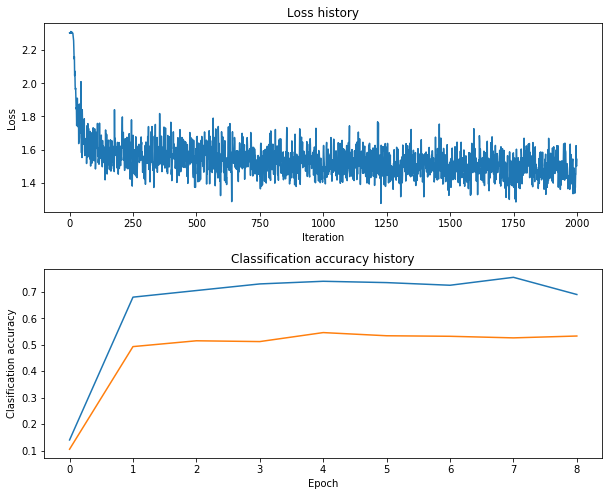

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 1.570809
iteration 200 / 2000: loss 1.468940
iteration 300 / 2000: loss 1.389850
iteration 400 / 2000: loss 1.398336
iteration 500 / 2000: loss 1.247479
iteration 600 / 2000: loss 1.338208
iteration 700 / 2000: loss 1.467443
iteration 800 / 2000: loss 1.334299
iteration 900 / 2000: loss 1.376533
iteration 1000 / 2000: loss 1.313898
iteration 1100 / 2000: loss 1.453395
iteration 1200 / 2000: loss 1.422506
iteration 1300 / 2000: loss 1.398525
iteration 1400 / 2000: loss 1.244463
iteration 1500 / 2000: loss 1.221392
iteration 1600 / 2000: loss 1.329785
iteration 1700 / 2000: loss 1.301514
iteration 1800 / 2000: loss 1.442458
iteration 1900 / 2000: loss 1.321149
learning rate: 1.154798e+00, reg: 2.969693e-03, train_acc: 0.644796, val_acc: 0.589000 


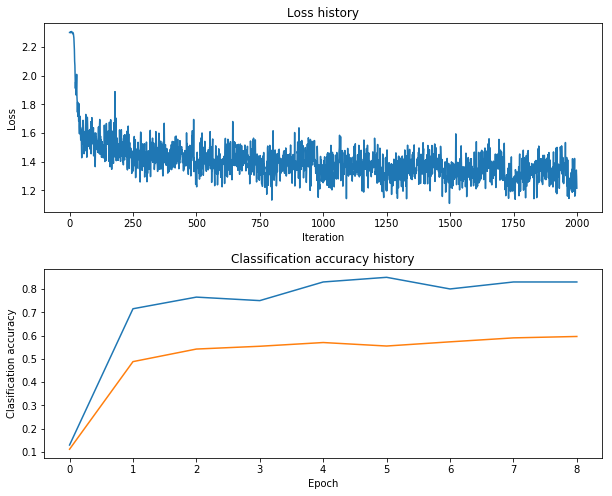

iteration 0 / 2000: loss 2.302588
iteration 100 / 2000: loss 1.627528
iteration 200 / 2000: loss 1.651706
iteration 300 / 2000: loss 1.581877
iteration 400 / 2000: loss 1.796612
iteration 500 / 2000: loss 1.433760
iteration 600 / 2000: loss 1.402066
iteration 700 / 2000: loss 1.551811
iteration 800 / 2000: loss 1.508898
iteration 900 / 2000: loss 1.647605
iteration 1000 / 2000: loss 1.429532
iteration 1100 / 2000: loss 1.492785
iteration 1200 / 2000: loss 1.509891
iteration 1300 / 2000: loss 1.610662
iteration 1400 / 2000: loss 1.441374
iteration 1500 / 2000: loss 1.541520
iteration 1600 / 2000: loss 1.502409
iteration 1700 / 2000: loss 1.512161
iteration 1800 / 2000: loss 1.380036
iteration 1900 / 2000: loss 1.551738
learning rate: 1.454341e+00, reg: 5.669336e-03, train_acc: 0.579367, val_acc: 0.527000 


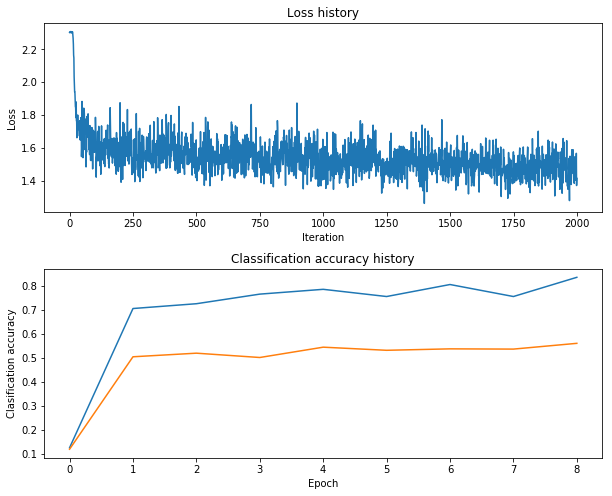

iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 1.715777
iteration 200 / 2000: loss 1.690440
iteration 300 / 2000: loss 1.613520
iteration 400 / 2000: loss 1.577240
iteration 500 / 2000: loss 1.554322
iteration 600 / 2000: loss 1.480847
iteration 700 / 2000: loss 1.573191
iteration 800 / 2000: loss 1.611098
iteration 900 / 2000: loss 1.718935
iteration 1000 / 2000: loss 1.610689
iteration 1100 / 2000: loss 1.662608
iteration 1200 / 2000: loss 1.475515
iteration 1300 / 2000: loss 1.676821
iteration 1400 / 2000: loss 1.565096
iteration 1500 / 2000: loss 1.501882
iteration 1600 / 2000: loss 1.544312
iteration 1700 / 2000: loss 1.577338
iteration 1800 / 2000: loss 1.421115
iteration 1900 / 2000: loss 1.516963
learning rate: 1.751723e+00, reg: 4.941117e-03, train_acc: 0.582490, val_acc: 0.529000 


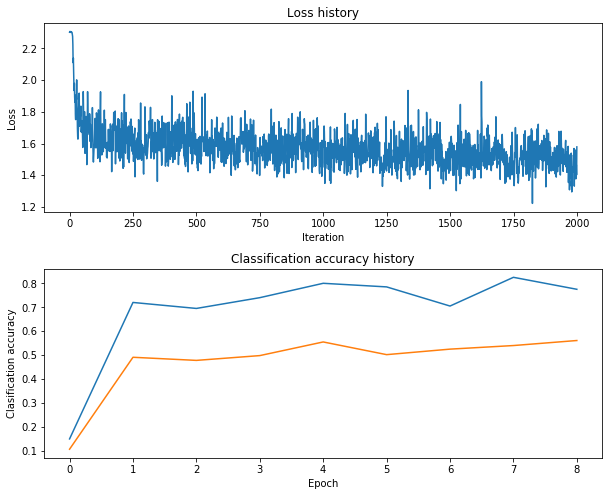

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 1.423671
iteration 200 / 2000: loss 1.322498
iteration 300 / 2000: loss 1.307309
iteration 400 / 2000: loss 1.452087
iteration 500 / 2000: loss 1.321561
iteration 600 / 2000: loss 1.238050
iteration 700 / 2000: loss 1.332156
iteration 800 / 2000: loss 1.063832
iteration 900 / 2000: loss 1.242422
iteration 1000 / 2000: loss 1.161704
iteration 1100 / 2000: loss 1.344951
iteration 1200 / 2000: loss 1.268254
iteration 1300 / 2000: loss 1.173099
iteration 1400 / 2000: loss 1.237199
iteration 1500 / 2000: loss 1.172666
iteration 1600 / 2000: loss 1.228962
iteration 1700 / 2000: loss 1.320047
iteration 1800 / 2000: loss 1.045622
iteration 1900 / 2000: loss 1.156087
learning rate: 1.276664e+00, reg: 1.315558e-03, train_acc: 0.688184, val_acc: 0.572000 


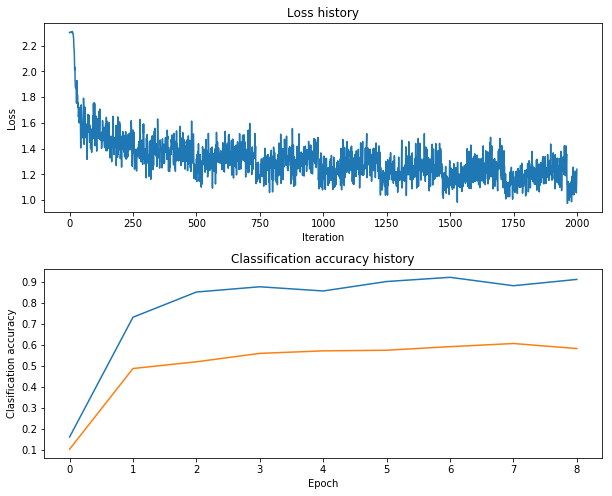

iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 1.651958
iteration 200 / 2000: loss 1.699121
iteration 300 / 2000: loss 1.515162
iteration 400 / 2000: loss 1.744686
iteration 500 / 2000: loss 1.531220
iteration 600 / 2000: loss 1.472135
iteration 700 / 2000: loss 1.502683
iteration 800 / 2000: loss 1.651313
iteration 900 / 2000: loss 1.585856
iteration 1000 / 2000: loss 1.390340
iteration 1100 / 2000: loss 1.684212
iteration 1200 / 2000: loss 1.559268
iteration 1300 / 2000: loss 1.591823
iteration 1400 / 2000: loss 1.596946
iteration 1500 / 2000: loss 1.590598
iteration 1600 / 2000: loss 1.493801
iteration 1700 / 2000: loss 1.438510
iteration 1800 / 2000: loss 1.523392
iteration 1900 / 2000: loss 1.655955
learning rate: 1.635847e+00, reg: 4.955324e-03, train_acc: 0.594286, val_acc: 0.546000 


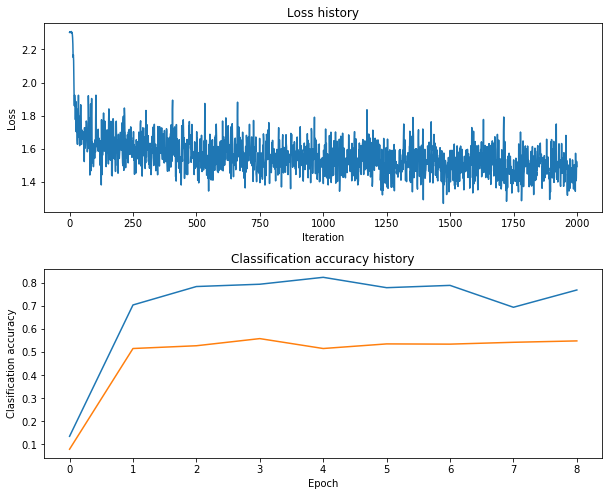

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 1.432230
iteration 200 / 2000: loss 1.524898
iteration 300 / 2000: loss 1.442568
iteration 400 / 2000: loss 1.459636
iteration 500 / 2000: loss 1.287534
iteration 600 / 2000: loss 1.332363
iteration 700 / 2000: loss 1.404604
iteration 800 / 2000: loss 1.315829
iteration 900 / 2000: loss 1.489162
iteration 1000 / 2000: loss 1.201966
iteration 1100 / 2000: loss 1.465580
iteration 1200 / 2000: loss 1.483812
iteration 1300 / 2000: loss 1.269817
iteration 1400 / 2000: loss 1.499952
iteration 1500 / 2000: loss 1.380558
iteration 1600 / 2000: loss 1.454031
iteration 1700 / 2000: loss 1.282618
iteration 1800 / 2000: loss 1.193007
iteration 1900 / 2000: loss 1.317382
learning rate: 1.616806e+00, reg: 1.760876e-03, train_acc: 0.683204, val_acc: 0.588000 


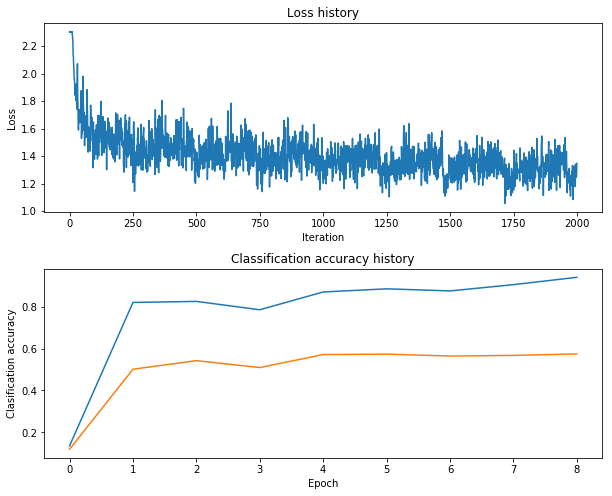

In [46]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = -1

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
def plt_loss(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplots_adjust(hspace = 0.3)

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()
    
results = {}
# bad range
# learning_rates = [5e-3, 1e-3] #[2e-3, 5e-4]#, 1e-4, 1e-5] # when lr >= 0.01, net divergence; lr <= 1e-5 is too small
# regularization_strengths = [1e1]#, 1e1, 1e2, 1e3] # reg >= 100 is bad
# hidden_sizes = [50, 100, 200, 300, 500]

# good range
# learning_rates = [1e-1, 5e-1, 1]#, 5]
# regularization_strengths = [1e-3, 5e-3, 1e-2]
# hidden_sizes = [500]

# lr =1 or 2 is good
from numpy.random import uniform
maxcount = 10
for count in xrange(maxcount):
    lr = 10**uniform(0, 0.3)
    reg = 10**uniform(-3, -2)
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)
    hist = net.train(X_train_feats, y_train, X_val_feats, y_val, 
              num_iters=2000, batch_size=200,
              learning_rate=lr, learning_rate_decay=0.95,
              reg=reg, verbose=True)
    train_acc = (net.predict(X_train_feats) == y_train).mean()
    val_acc = (net.predict(X_val_feats) == y_val).mean()
    if val_acc > best_val:
        best_val = val_acc
        best_net = net
    results[(lr, reg, hidden_dim)] = (train_acc, val_acc)
    print "learning rate: %e, reg: %e, train_acc: %5f, val_acc: %5f "% (lr, reg, train_acc, val_acc)
    plt_loss(hist)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [48]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print test_acc

0.579


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!